# <font color='red' size='6'>Inteligência Artificial</font>

### Agentes de Resolução de Problemas – Algoritmos de Busca - Busca Com Informação - Simulação

#### Algoritmo A*

Em primeiro lugar, vamos iniciar a resolução de problemas definindo precisamente os ** problemas ** e suas ** soluções **. Vamos olhar para vários algoritmos de busca de propósito geral. Em geral, os algoritmos de busca são classificados em dois tipos, sendo um deles os Algoritmos de Busca com Informação.

Algoritmos de Busca com Informação: Esses tipos de algoritmos alavancam qualquer informação (heurística) sobre o problema de busca através do espaço de busca para encontrar a solução de forma eficiente, por exemplo:
<ol>
    <li>Best First Search</li>
    <li><font color='red' size='3'>A* Search </font></li>
    <li>Recursive Best First Search</li>
</ol>

In [4]:
from search import *

## Definindo o Problema

Agora é hora de definir o nosso problema. Nosso problema é encontrar o estado objetivo a partir do estado inicial no grafo fornecido. Dê uma olhada no nosso romania_map, que é um Grafo não Direcionado contendo um dict de nodes como chaves e cidades vizinhas como valores.

In [8]:
romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

In [10]:
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)

# Visualizando o Mapa da Romênia

Vamos ver uma visualização do mapa da Romênia e ver como diferentes algoritmos de busca executam.

In [13]:
romania_locations = romania_map.locations
print(romania_locations)

{'Arad': (91, 492), 'Bucharest': (400, 327), 'Craiova': (253, 288), 'Drobeta': (165, 299), 'Eforie': (562, 293), 'Fagaras': (305, 449), 'Giurgiu': (375, 270), 'Hirsova': (534, 350), 'Iasi': (473, 506), 'Lugoj': (165, 379), 'Mehadia': (168, 339), 'Neamt': (406, 537), 'Oradea': (131, 571), 'Pitesti': (320, 368), 'Rimnicu': (233, 410), 'Sibiu': (207, 457), 'Timisoara': (94, 410), 'Urziceni': (456, 350), 'Vaslui': (509, 444), 'Zerind': (108, 531)}


Vamos começar as visualizações importando os módulos necessários. Usamos networkx e matplotlib para mostrar o mapa no notebook e usamos ipywidgets para interagir com o mapa para ver como funciona o algoritmo de busca.

In [16]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

Vamos começar inicializando um grafo vazio. Vamos adicionar nós, coloque os nós em seu local como mostrado no livro, adicione bordas para o grafo.

In [19]:
# Inicializa o Grafo
G = nx.Graph()

# Use isso ao rotular nós no mapa
node_labels = dict()

# Use isso para modificar as cores dos nós enquanto explora o grafo.
# Este é o único dic que enviamos para `show_map (node_colors)` ao desenhar o mapa
node_colors = dict()

for n, p in romania_locations.items():
    G.add_node(n)
    node_labels[n] = n
    node_colors[n] = "blue"

# Vamos salvar as cores do nó inicial para um dict para usar mais tarde
initial_node_colors = dict(node_colors)
    
# Posições para rótulos de nó
node_label_pos = {k:[v[0],v[1]-10] for k,v in romania_locations.items()}

# Use o tempo marcando bordas
edge_labels = dict()

# Adicionar bordas entre cidades no mapa da Roménia - UndirectedGraph definido em search.py
for node in romania_map.nodes():
    connections = romania_map.get(node)
    for connection in connections.keys():
        distance = connections[connection]
        G.add_edge(node, connection)
        edge_labels[(node, connection)] = distance

Concluímos a construção do nosso grafo com base em romania_map e suas localizações. É hora de exibi-lo aqui no notebook. Esta função `show_map (node_colors)` nos ajuda a fazer isso. Estaremos chamando esta função mais tarde para exibir o mapa em cada intervalo de intervalo durante a pesquisa usando variedade de algoritmos do livro.

In [22]:
def show_map(node_colors):
    
    # Tamanho do grafo
    plt.figure(figsize=(18,13))

    # Desenhando o grafo
    nx.draw(G, pos = romania_locations, node_color = [node_colors[node] for node in G.nodes()])

    node_label_handles = nx.draw_networkx_labels(G, pos = node_label_pos, labels = node_labels, font_size = 20)
    
    [label.set_bbox(dict(facecolor='white', edgecolor='none')) for label in node_label_handles.values()]

    nx.draw_networkx_edge_labels(G, pos = romania_locations, edge_labels=edge_labels, font_size = 20)
    
    # Legenda
    white_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="blue")
    orange_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="orange")
    red_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="red")
    gray_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="gray")
    plt.legend((white_circle, orange_circle, red_circle, gray_circle),
               ('Não Explorado', 'Fronteira', 'Explorando neste momento', 'Explorado'),
               numpoints=1,prop={'size':16}, loc=(.8,.75))
    
    plt.show()

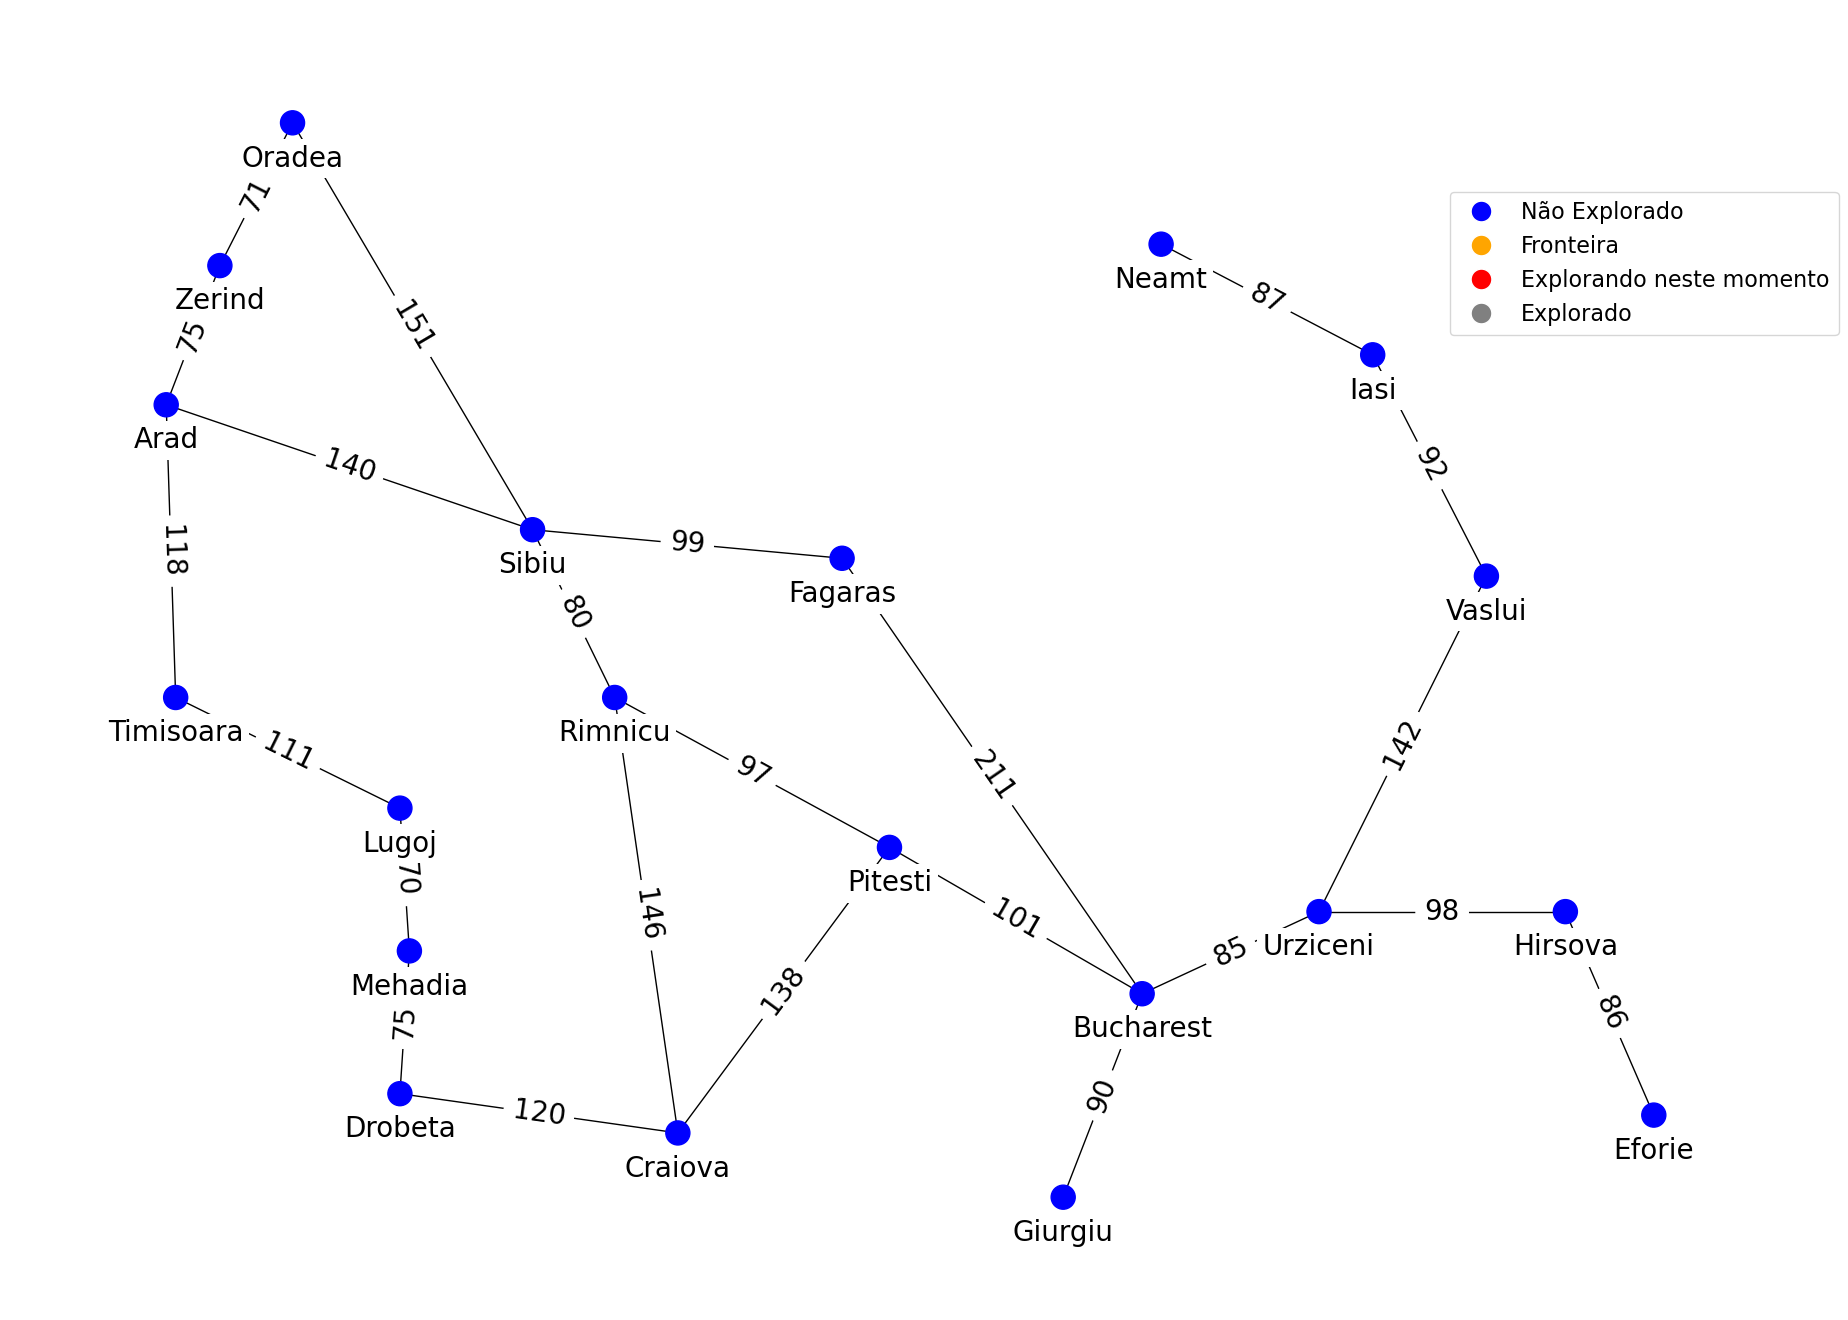

In [24]:
show_map(node_colors)

In [26]:
# módulo python para fazer o algoritmo executar mais lentamente com sleep
import time
tempoSegundos = 5

## Visualizando a Busca A*

Foram adicionadas cores aos nós para ter uma visualização mais compreensível. Então, essas são as diferentes cores que estamos usando nesses visuais:

* Nós Não Explorados - <font color='black'>azul</font>
* Nós Fronteira - <font color='orange'>laranja</font>
* Nós Sendo Explorados Neste Momento - <font color='red'>vermelho</font>
* Nós já Explorados - <font color='gray'>cinza</font>

In [29]:
# Esse código define o que a cor representa
# define como cada nó será colorido dentro do nosso mapa
def final_path_colors(problem, solution):
    "Retorna um node_colors dict do caminho final do problema até a solução"
    
    final_colors = dict(initial_node_colors)
    final_colors[problem.initial] = "green"
    for node in solution:
        final_colors[node] = "green"  
    return final_colors


def display_visual(user_input, algorithm=None, problem=None):
    if user_input == False:
        def slider_callback(iteration):
            try:
                show_map(all_node_colors[iteration])
            except:
                pass
        def visualize_callback(Visualize):
            if Visualize is True:
                button.value = False
                
                global all_node_colors
                
                iterations, all_node_colors, node = algorithm(problem)
                solution = node.solution()
                all_node_colors.append(final_path_colors(problem, solution))
                
                slider.max = len(all_node_colors) - 1
                
                for i in range(slider.max + 1):
                    time.sleep(tempoSegundos)
                    slider.value = i
        
        slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
        slider_visual = widgets.interactive(slider_callback, iteration = slider)
        display(slider_visual)

        button = widgets.ToggleButton(value = False)
        button_visual = widgets.interactive(visualize_callback, Visualize = button)
        display(button_visual)
    
    if user_input == True:
        node_colors = dict(initial_node_colors)
        if algorithm == None:
            algorithms = {"Breadth First Tree Search": breadth_first_tree_search, "Breadth First Search": breadth_first_search, "Uniform Cost Search": uniform_cost_search, "A-star Search": astar_search}
            algo_dropdown = widgets.Dropdown(description = "Search algorithm: ", options = sorted(list(algorithms.keys())), value = "Breadth First Tree Search")
            display(algo_dropdown)
        
        def slider_callback(iteration):
            try:
                show_map(all_node_colors[iteration])
            except:
                pass
            
        def visualize_callback(Visualize):
            if Visualize is True:
                button.value = False
                
                problem = GraphProblem(start_dropdown.value, end_dropdown.value, romania_map)
                global all_node_colors
                
                if algorithm == None:
                    user_algorithm = algorithms[algo_dropdown.value]
            
                
                iterations, all_node_colors, node = user_algorithm(problem)
                solution = node.solution()
                all_node_colors.append(final_path_colors(problem, solution))

                slider.max = len(all_node_colors) - 1
                
                for i in range(slider.max + 1):
                    slider.value = i
                         
        start_dropdown = widgets.Dropdown(description = "Start city: ", options = sorted(list(node_colors.keys())), value = "Arad")
        display(start_dropdown)

        end_dropdown = widgets.Dropdown(description = "Goal city: ", options = sorted(list(node_colors.keys())), value = "Fagaras")
        display(end_dropdown)
        
        button = widgets.ToggleButton(value = False)
        button_visual = widgets.interactive(visualize_callback, Visualize = button)
        display(button_visual)
        
        slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
        slider_visual = widgets.interactive(slider_callback, iteration = slider)
        display(slider_visual)
        

## A* Search

Vamos mudar todos os node_colors para a posição inicial e definir uma declaração de problema diferente.

In [32]:
def best_first_graph_search(problem, f):

    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue(min, f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

def astar_search(problem, h=None):
    """A busca A* é a melhor pesquisa de grafo com f (n) = g (n) + h (n).
     Você precisa especificar a função h quando você chama a função astar_search, ou
     em sua subclasse de Problemas."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search(problem, lambda n: n.path_cost + h(n))
    return(iterations, all_node_colors, node)

In [40]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(user_input = False, algorithm = best_first_graph_search, problem = romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

### <font size = '2'>prof. Dr. Ivan Carlos Alcântara de Oliveira</font> - <font size = '2' color="blue">https://orcid.org/0000-0002-6020-7535</font>